<a href="https://colab.research.google.com/github/Bhavnicksm/dsp_lab_notebooks/blob/main/EE333_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1


In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

1) Write a script to generate the samples of a sinusoid whose frequency and sampling rate are specified
by the user. Also display this in two separate figures, (i) as a continuous sinusoid, (ii) and as the
individual samples. (hint: Use the plot and stem commands).

In [156]:
def sampling_sine(freq, rate):
  lst = np.arange(0,2*np.pi,2*np.pi*freq/rate)
  wave = np.sin(lst)

  plt.figure(figsize=(15,10))
  plt.subplot(211)
  plt.plot(lst,wave)
  plt.subplot(212)
  plt.stem(lst,wave)

  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


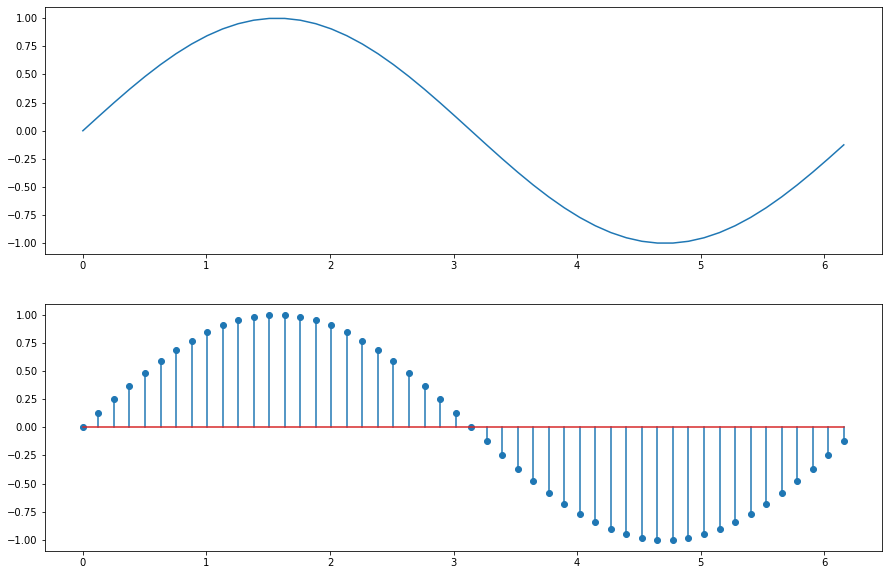

In [157]:
sampling_sine(2,100)

2) Write a script to generate a random vector of length 10000 using the rand command, and plot its
histogram, and compare that against the uniform pdf in the range (0,1).

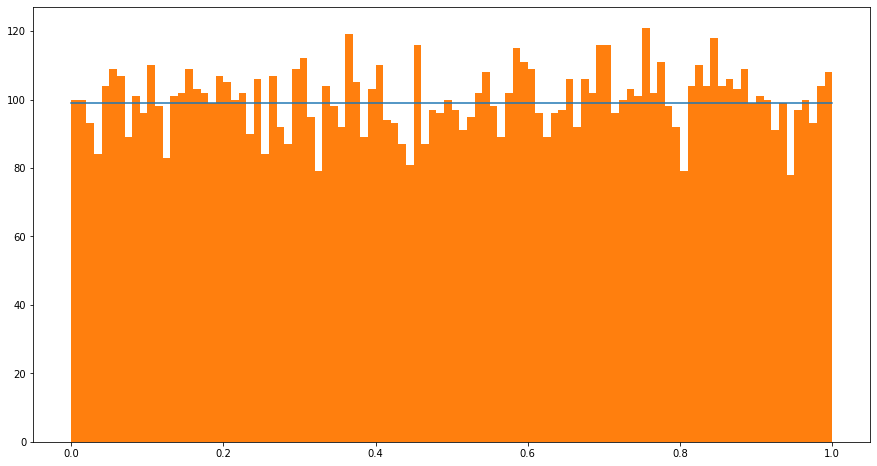

In [93]:
bin_size = 0.01
x = np.random.rand(10000)
bins = np.arange(0,1 + bin_size,bin_size)

plt.figure(figsize=(15,8))
plt.plot((10000/len(bins))*np.ones(2))
plt.hist(x,bins=bins)
plt.show()

3) Repeat problem 2 using the randn and randi commands, and comment on the difference between
the outputs of the three random number generators.

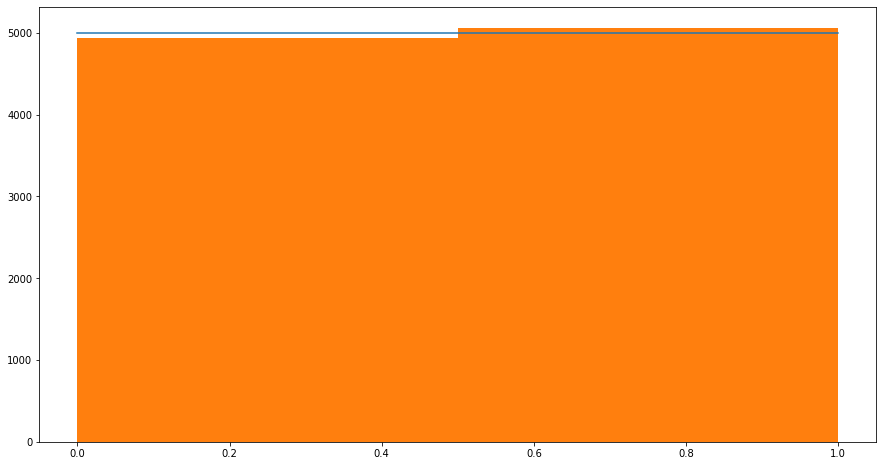

In [112]:
x = np.random.randint(0,2,size=(10000))
bins = [0,0.5,1]

plt.figure(figsize=(15,8))
plt.plot((10000/(len(bins)-1))*np.ones(2))
plt.hist(x,bins=bins)
plt.show()

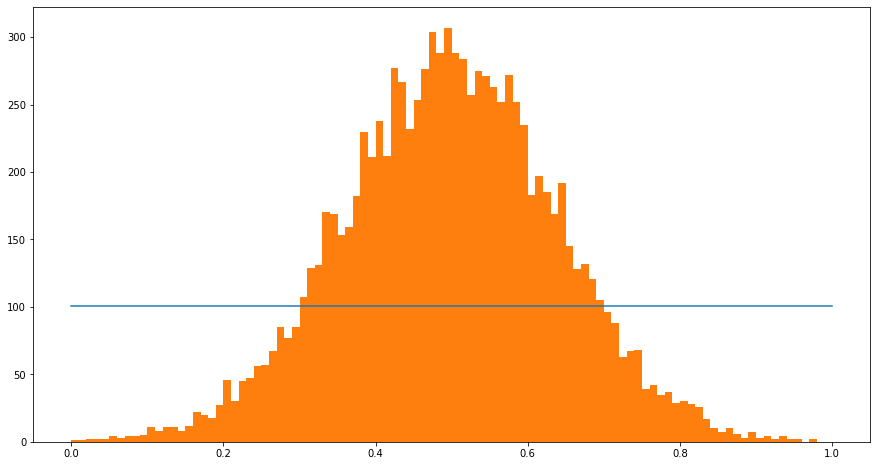

In [110]:
x = np.random.randn(10000)
x = (x + abs(x.min()))/(x.max()-x.min())
bins = np.arange(0,1,0.01)

plt.figure(figsize=(15,8))
plt.plot((10000/(len(bins)-1))*np.ones(2))
plt.hist(x,bins=bins)
plt.show()

4) Write a function ‘averg’ to numerically evaluate the average of an input vector. You may only use
the for loop and the length command.

In [116]:
def averg(x):
  sum = 0
  for i in x:
    sum+=i
  return (sum/len(x))


x = np.random.rand(10000)
averg(x)

0.4962198807136821

5) Write a script to use the function ‘averg’ defined in problem 6 to evaluate empirical variance of
an input random vector.

In [120]:
x = np.random.rand(10000)
mean_x = averg(x)
var = ( (x-mean_x)**2 /(len(x)-1)).sum()
print(var)

0.08314000693914084


6) Write a function gateduty(N,d) to generate a rectangular pulse of length N with a duty cycle of
d%.

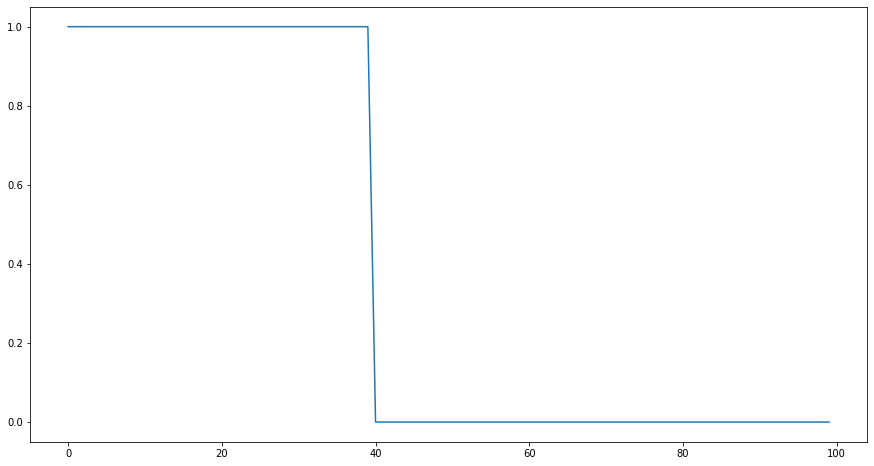

In [149]:
def gateduty(n,d):
  wave = np.ones(int(n*d/100))
  padded = np.pad(wave,(0,int(n-(n*d/100))))
  return padded


plt.figure(figsize=(15,8))
plt.plot(gateduty(100,40))
plt.show()

7) Write a script to generate M periods of gateduty(N,d), and use the following commands to obtain
the power spectral density of the generated signal.
a. fft b.psd c. pwelch

Comment on the so obtained in your lab record for different values of M;N and D, and different
due to the use of different commands. What is the difference between these commands?

In [138]:
import scipy.signal as sig

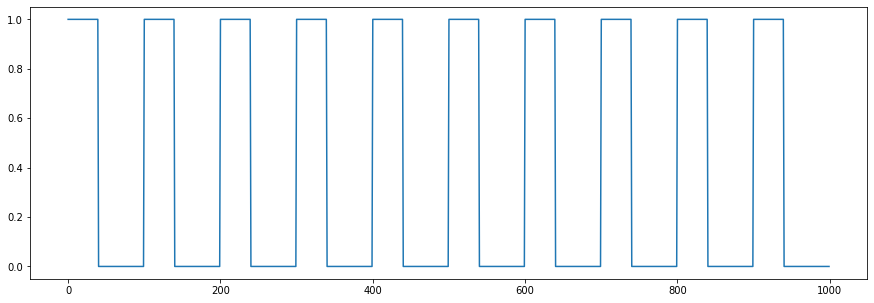

In [177]:
M = 10
x = gateduty(100,40)
y=[]
for i in range(M):
  y = np.concatenate((y,x))

plt.figure(figsize=(15,5))
plt.plot(y)
plt.show()

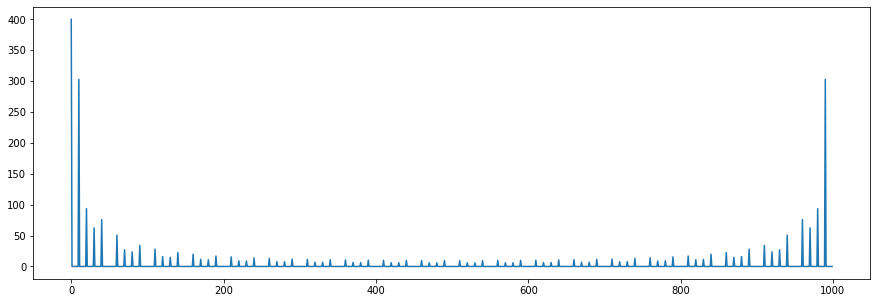

In [178]:
y_fft = abs(np.fft.fft(y))

plt.figure(figsize=(15,5))
plt.plot(y_fft)
plt.show()

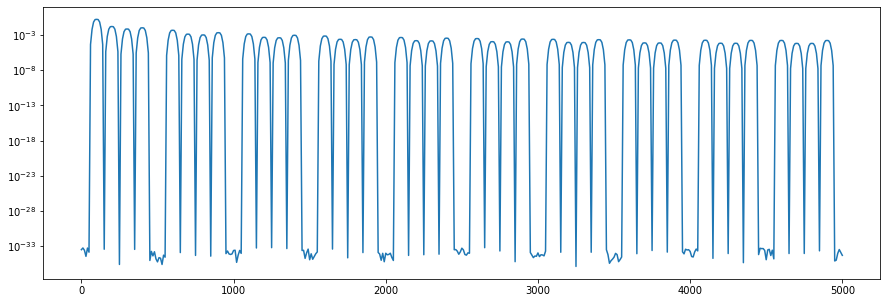

In [179]:
f, Pper_spec = sig.periodogram(y,10e3,'flattop',scaling='spectrum')

plt.figure(figsize=(15,5))
plt.semilogy(f, Pper_spec)
plt.show()

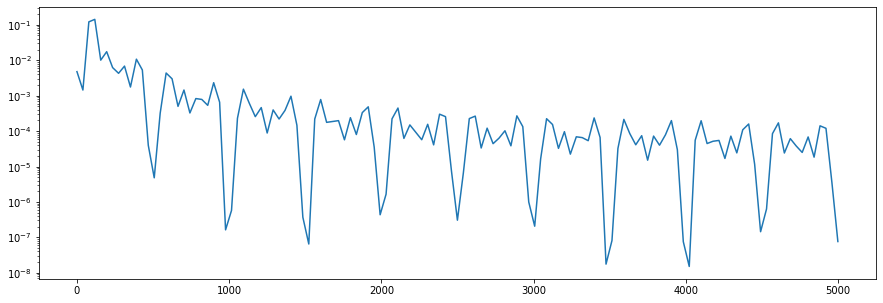

In [181]:
f, Pper_spec = sig.welch(y,10e3,scaling='spectrum')

plt.figure(figsize=(15,5))
plt.semilogy(f, Pper_spec)
plt.show()

8) Write a function sampmean(N), with an integer input N, for calculating the sample mean of N
zero mean Gaussian random variables having unit variance.